In [117]:
import probabilisticgraph as pg
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
%matplotlib notebook

In [71]:
def graph_to_csv(graph):
    names = []
    entries = []
    columns = []
    for a in graph.alphabet:
        columns.extend([a, 'P(' + a + ')'])
    for s in graph.states:
        names.append(s.name)
        entry = []
        for letter in graph.alphabet:
            ns = s.next_state_from_edge(letter)
            n = ns.name if ns else 'None'
            entry.extend([n, s.prob_to_next_letter(letter)])
        entries.append(entry)
    df = pd.DataFrame(entries, index=names, columns=columns)
    return df

In [128]:
def partition(graph_table, labels, alphabet):
    idxs = [x for x in df.columns if 'P' not in x]
    det_graph = df.loc[:,idxs]
    det_graph['partitions'] = labels
    for a in alphabet:
        det_graph['to' + a] = [det_graph.loc[x,'partitions'] if x != 'None'
                               else 'None'
                               for x in det_graph[a]]
    return det_graph

In [185]:
def moore_iteration(p, alphabet):
    r = p['partitions'].unique()
    q = p.drop(labels=alphabet, axis=1)
    count = max(r) + 1
    to = ['to' + x for x in alphabet]
    for i in r:
        u = q[q['partitions'] == i]
        z = u.loc[(u[to] == u.ix[0,to]).apply(all, axis=1)==False,:]
        while not z.empty:
            p.loc[z.index, 'partition'] = count
            count += 1
            z = u.loc[(u[to] == u.ix[0,to]).apply(all, axis=1)==False,:]
    return p

In [188]:
def moore(p, alphabet):
    done = False
    while not done:
        old_p = p['partitions']
        p = moore_iteration(p, alphabet)
        if old_p == p['partitions']:
            done = True
    return p

In [122]:
graph_name = 'graphs/ternary10db/dmarkov_d8'
if graph_name + '.csv' in os.listdir('.'):
    df = pd.read_csv(graph_name + '.csv', index=[0])
else:
    g = pg.ProbabilisticGraph(path = graph_name + '.yaml')
    df = graph_to_csv(g)
    df.to_csv(graph_name + '.csv')
df.head(5)

,0,P(0),1,P(1),2,P(2)
12111112,21111120,0.346535,21111121,0.584158,21111122,0.069307
12111110,21111100,0.472813,21111101,0.446809,21111102,0.080378
12111111,21111110,0.481586,21111111,0.396601,21111112,0.121813
22210212,22102120,0.500000,22102121,0.500000,22102122,0.000000
22210210,22102100,0.454545,22102101,0.272727,22102102,0.272727


<IPython.core.display.Javascript object>


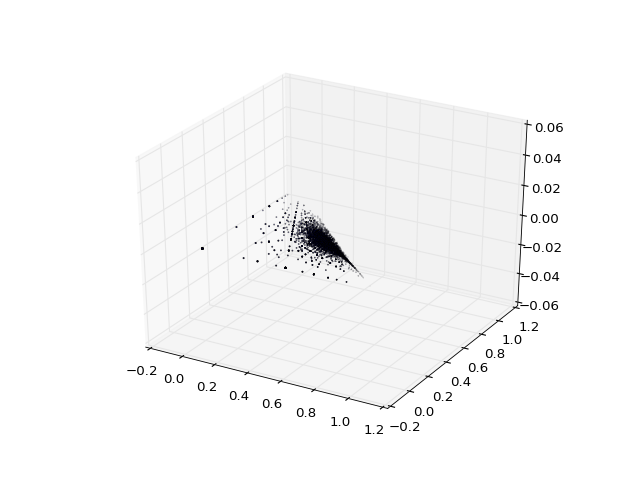

In [124]:
idxs = [x for x in df.columns if 'P' in x]
morphs = df.loc[:,idxs]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(morphs.iloc[:,0], morphs.iloc[:,1], morphs.iloc[:,2])
plt.show()

<IPython.core.display.Javascript object>


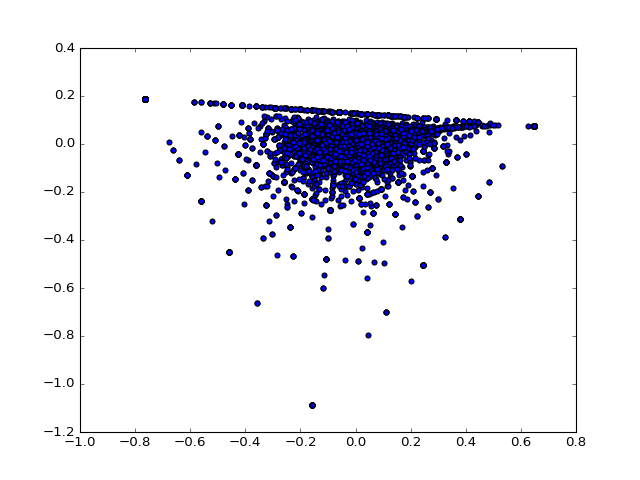

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components = len(g.alphabet) - 1)
pca.fit(morphs)
T = pca.transform(morphs)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
plt.scatter(T[:,0], T[:,1])
plt.show()

In [126]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means.fit(T)
labels = k_means.predict(T)
centroids = k_means.cluster_centers_

In [274]:
p = partition(df, labels, g.alphabet)
h = moore(p, g.alphabet)

TypeError: 'instancemethod' object is not iterable

(3580, 4)
(2511, 4)


True